In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [33]:
Avocado = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv')
Avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [34]:
Avocado.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
Avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


In [36]:
Avocado.dtypes

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [37]:
Avocado.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [38]:
Avocado.nunique().count()

14

In [39]:
Avocado.nunique()

Unnamed: 0        52
Date             104
AveragePrice     113
Total Volume    1517
4046            1517
4225            1517
4770            1516
Total Bags      1517
Small Bags      1517
Large Bags      1377
XLarge Bags      711
type               1
year               2
region            51
dtype: int64

In [40]:
Avocado = Avocado.drop(columns = ['Unnamed: 0'])
Avocado

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
Avocado.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
Avocado['XLarge Bags'].nunique

<bound method IndexOpsMixin.nunique of 0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
16463    NaN
16464    NaN
16465    NaN
16466    NaN
16467    NaN
Name: XLarge Bags, Length: 16468, dtype: float64>

In [43]:
Avocado = Avocado.drop(columns = ['XLarge Bags'])
Avocado

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
Avocado.rename(columns={'4046':'4046_sold','4225':'4225_sold','4770':'4770_sold'}, inplace = True)
print('Avocado')

Avocado


In [45]:
Avocado.head()

,Date,AveragePrice,Total Volume,4046_sold,4225_sold,4770_sold,Total Bags,Small Bags,Large Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,conventional,2015.0,Albany


<AxesSubplot:>

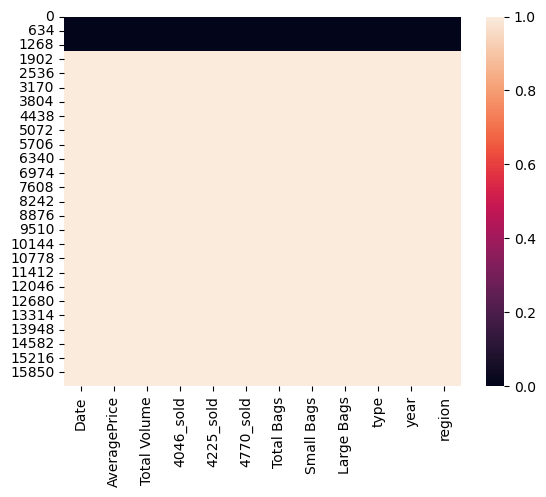

In [46]:
sns.heatmap(Avocado.isnull())

In [47]:
Avocado = Avocado.dropna()

In [48]:
Avocado.tail()

,Date,AveragePrice,Total Volume,4046_sold,4225_sold,4770_sold,Total Bags,Small Bags,Large Bags,type,year,region
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,conventional,2016.0,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,conventional,2016.0,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,conventional,2016.0,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,conventional,2016.0,Charlotte
1516,18-09-2016,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,conventional,2016.0,Charlotte


<AxesSubplot:>

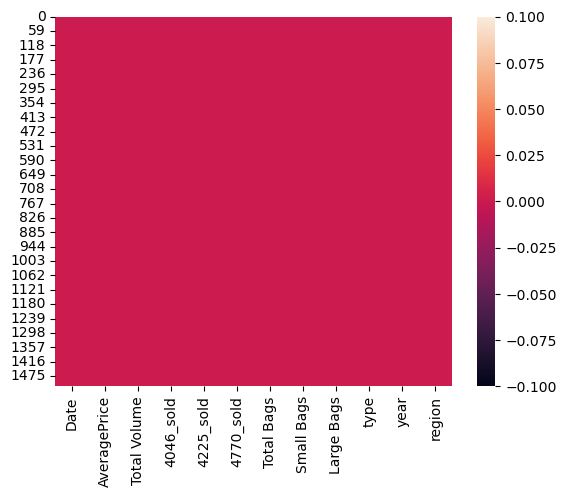

In [49]:
sns.heatmap(Avocado.isnull())

In [50]:
Avocado.reset_index()

,index,Date,AveragePrice,Total Volume,4046_sold,4225_sold,4770_sold,Total Bags,Small Bags,Large Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,conventional,2015.0,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,conventional,2015.0,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,conventional,2015.0,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,conventional,2015.0,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,conventional,2016.0,Charlotte
1513,1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,conventional,2016.0,Charlotte
1514,1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,conventional,2016.0,Charlotte
1515,1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,conventional,2016.0,Charlotte


In [51]:
Avocado.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046_sold       0
4225_sold       0
4770_sold       0
Total Bags      0
Small Bags      0
Large Bags      0
type            0
year            0
region          0
dtype: int64

In [52]:
Avocado['Date'] = pd.to_datetime(Avocado['Date'])

In [53]:
Avocado.head()

,Date,AveragePrice,Total Volume,4046_sold,4225_sold,4770_sold,Total Bags,Small Bags,Large Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,conventional,2015.0,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,conventional,2015.0,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,conventional,2015.0,Albany
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,conventional,2015.0,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,conventional,2015.0,Albany


In [54]:
Avocado.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046_sold              float64
4225_sold              float64
4770_sold              float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
type                    object
year                   float64
region                  object
dtype: object

In [55]:
Avocado.set_index('Date', inplace = True)

In [56]:
Avocado.head()

,AveragePrice,Total Volume,4046_sold,4225_sold,4770_sold,Total Bags,Small Bags,Large Bags,type,year,region
Date,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,conventional,2015.0,Albany
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,conventional,2015.0,Albany
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,conventional,2015.0,Albany
2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,conventional,2015.0,Albany
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,conventional,2015.0,Albany


In [57]:
Avocado['region'].nunique

<bound method IndexOpsMixin.nunique of Date
2015-12-27       Albany
2015-12-20       Albany
2015-12-13       Albany
2015-06-12       Albany
2015-11-29       Albany
                ...    
2016-10-16    Charlotte
2016-09-10    Charlotte
2016-02-10    Charlotte
2016-09-25    Charlotte
2016-09-18    Charlotte
Name: region, Length: 1517, dtype: object>

In [58]:
Avocado['region'].nunique()

51

In [59]:
Avocado.duplicated().sum()

0

In [60]:
Avocado.describe()

,AveragePrice,Total Volume,4046_sold,4225_sold,4770_sold,Total Bags,Small Bags,Large Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,2016.000000


In [61]:
Avocado.shape

(1517, 11)

ValueError: could not convert string to float: 'conventional'

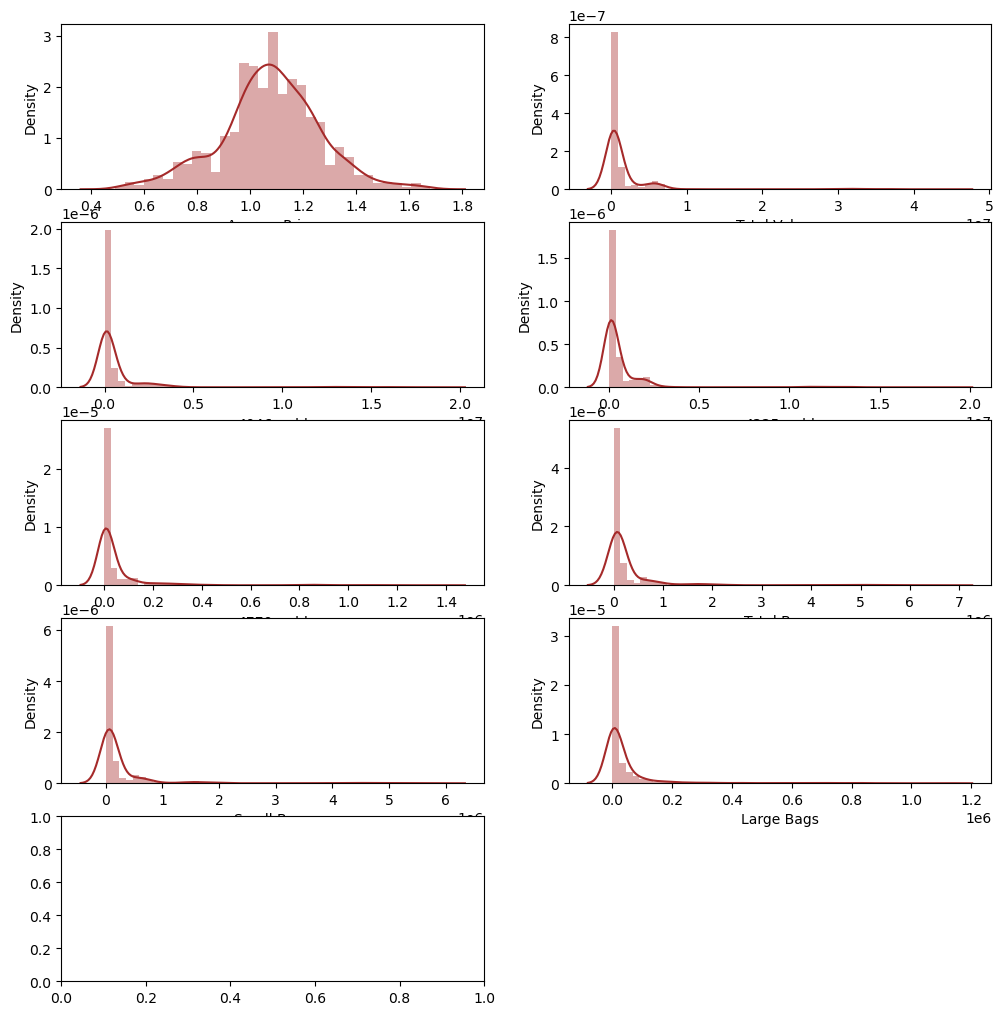

In [62]:
plt.figure(figsize=(12,15), facecolor = 'white')
plotnumber = 1
for column in Avocado:
    if plotnumber<=11:
        ax = plt.subplot(6,2,plotnumber)
        sns.distplot(Avocado[column], color ='brown')
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [63]:
E = OrdinalEncoder()

In [64]:
encode1 = OrdinalEncoder(categories=[['Albany','Houston', 'Portland', 'West', 'Orlando', 'LosAngeles', 'Louisville', 'HarrisburgScranton', 'Southeast', 'StLouis', 'Pittsburgh', 'DallasFtWorth', 'RaleighGreensboro', 'GreatLakes', 'Plains', 'MiamiFtLauderdale', 'Indianapolis', 'RichmondNorfolk', 'Detroit', 'Northeast', 'Spokane', 'Atlanta', 'Nashville', 'SanFrancisco', 'Boston', 'BaltimoreWashington', 'Roanoke', 'SanDiego', 'Tampa', 'WestTexNewMexico', 'TotalUS', 'NewYork', 'Syracuse', 'Philadelphia', 'HartfordSpringfield', 'PhoenixTucson', 'NorthernNewEngland', 'BuffaloRochester', 'Columbus', 'LasVegas', 'Denver', 'Boise', 'Chicago', 'Midsouth', 'California', 'Seattle', 'Jacksonville', 'GrandRapids', 'Charlotte', 'SouthCentral', 'SouthCarolina']])

In [65]:
Avocado1 = encode1.fit_transform(Avocado[['region']])


In [66]:
Avocado1.dtype

dtype('float64')

In [67]:
Avocado1

array([[ 0.],
       [ 0.],
       [ 0.],
       ...,
       [48.],
       [48.],
       [48.]])

In [68]:
Avocado['region']=Avocado1

In [69]:
Avocado.head()

,AveragePrice,Total Volume,4046_sold,4225_sold,4770_sold,Total Bags,Small Bags,Large Bags,type,year,region
Date,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,conventional,2015.0,0.0
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,conventional,2015.0,0.0
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,conventional,2015.0,0.0
2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,conventional,2015.0,0.0
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,conventional,2015.0,0.0


In [70]:
encode2 = OrdinalEncoder(categories=[['conventional']])
      

In [71]:
Avocado2 = encode2.fit_transform(Avocado[['type']])


In [72]:
Avocado['type']=Avocado2
Avocado.head()


,AveragePrice,Total Volume,4046_sold,4225_sold,4770_sold,Total Bags,Small Bags,Large Bags,type,year,region
Date,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,0.0
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,0.0
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,0.0
2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,0.0
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,0.0


In [73]:
Avocado.isnull().sum()

AveragePrice    0
Total Volume    0
4046_sold       0
4225_sold       0
4770_sold       0
Total Bags      0
Small Bags      0
Large Bags      0
type            0
year            0
region          0
dtype: int64

In [74]:
Avocado.dtypes

AveragePrice    float64
Total Volume    float64
4046_sold       float64
4225_sold       float64
4770_sold       float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
type            float64
year            float64
region          float64
dtype: object

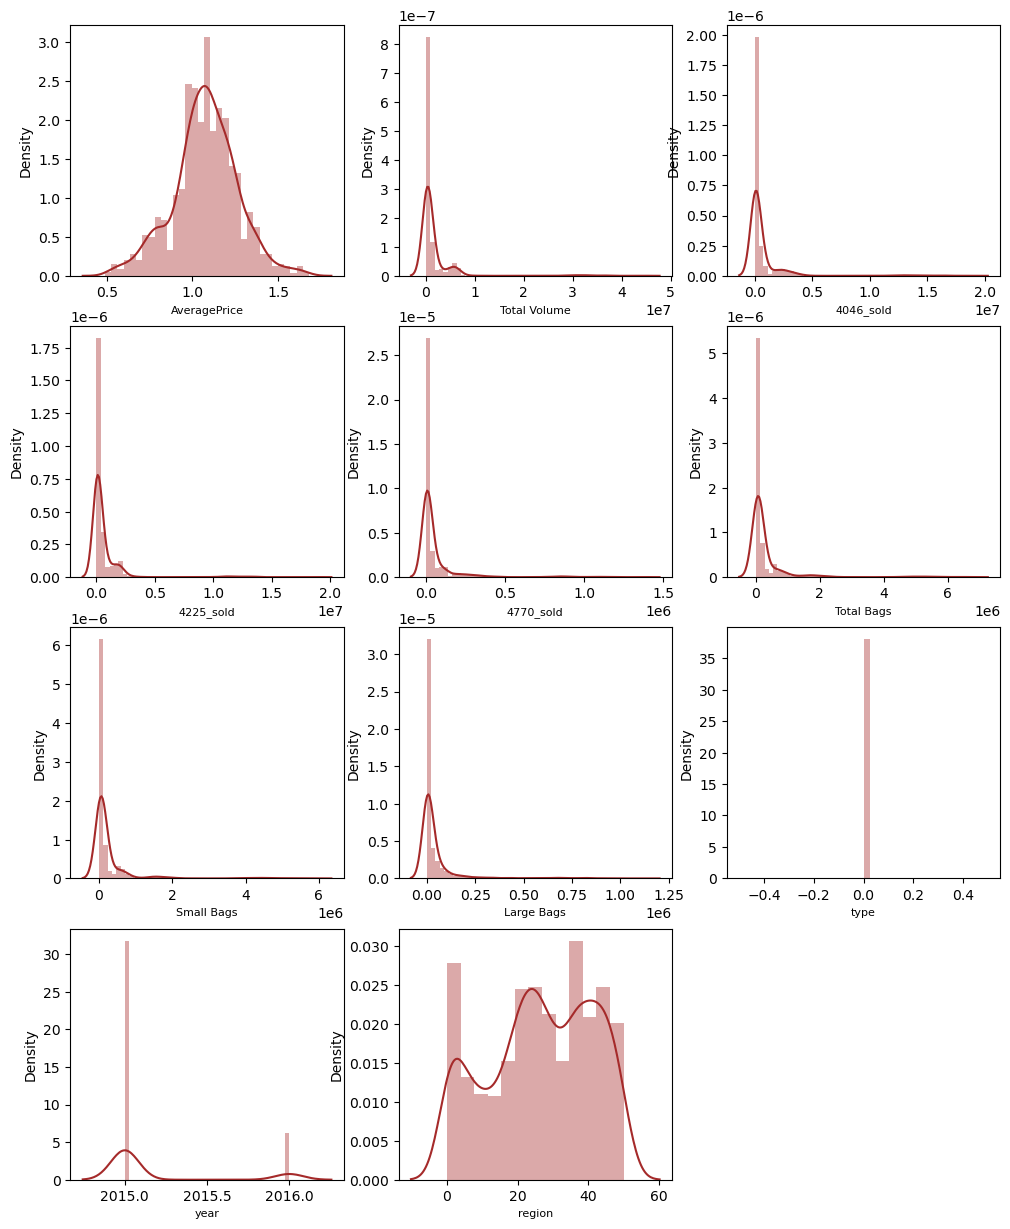

In [75]:
plt.figure(figsize=(12,15), facecolor = 'white')
plotnumber = 1
for column in Avocado:
    if plotnumber<=11:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(Avocado[column], color ='brown')
        plt.xlabel(column,fontsize=8)
    plotnumber+=1
plt.show()

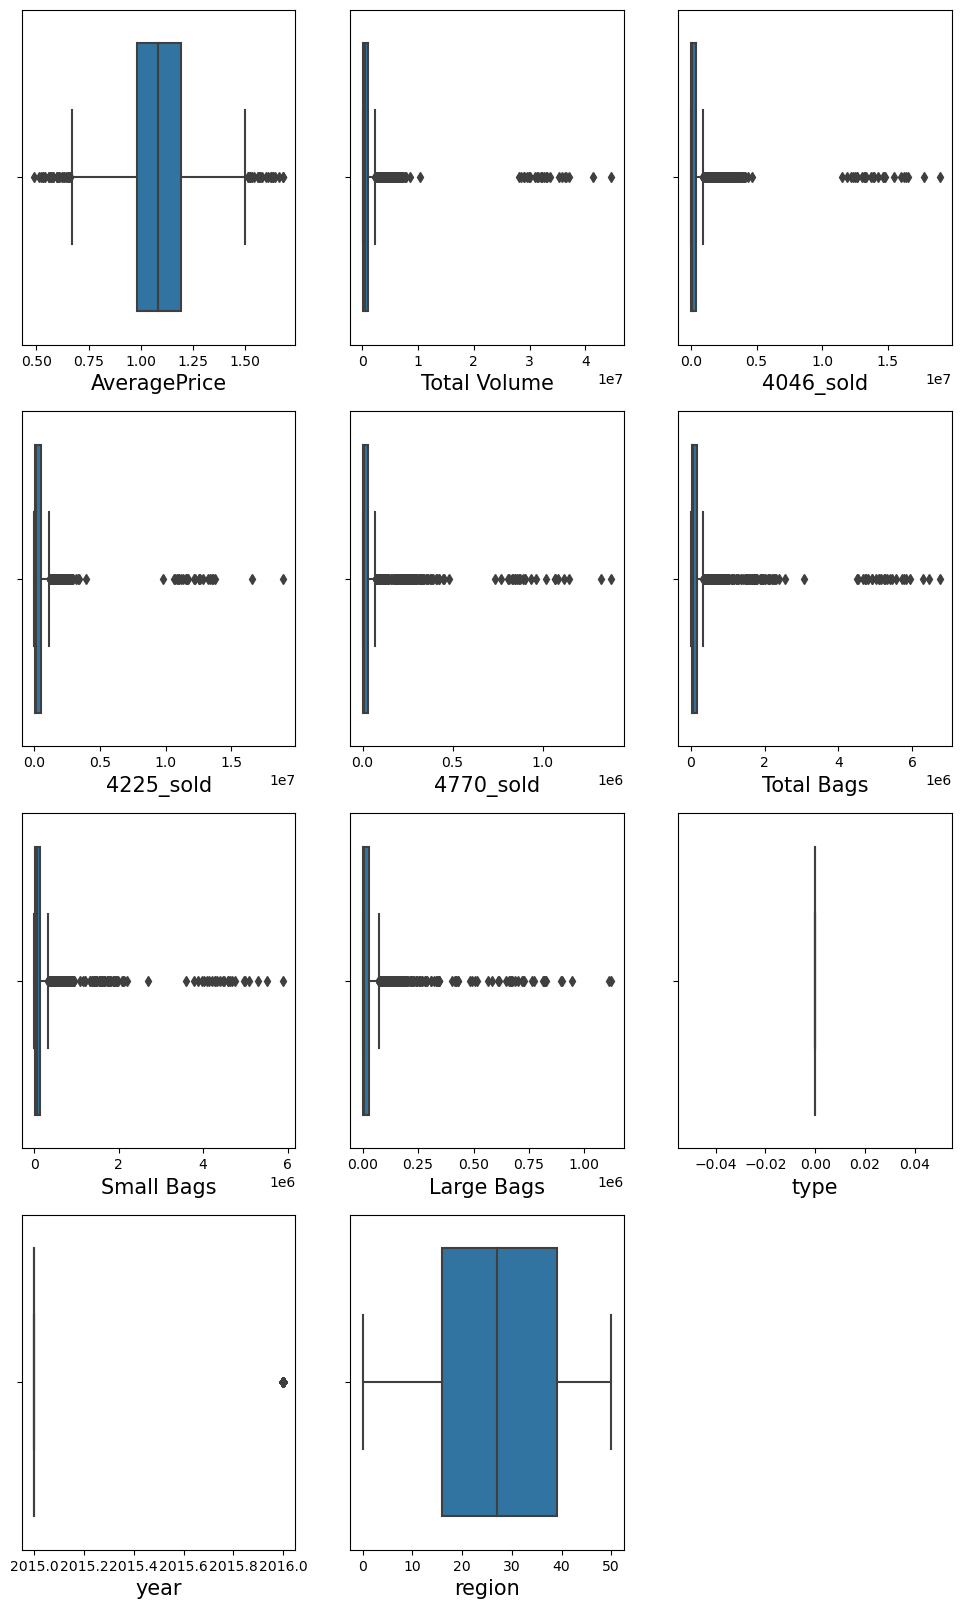

In [76]:
plt.figure(figsize=(12,20))
plotnumber = 1
for column in Avocado:
    if plotnumber<=11:
        ax = plt.subplot(4,3,plotnumber)
        sns.boxplot(Avocado[column])
        plt.xlabel(column,fontsize = 15)
    plotnumber+=1
plt.show()

In [77]:
q1 =Avocado.quantile(0.25)
q3 = Avocado.quantile(0.75)
iqr = q3-q1

In [78]:
Avocado1 = Avocado[~((Avocado<(q1-1.5*iqr))|(Avocado>(q3+1.5*iqr))).any(axis=1)]

In [79]:
Avocado1.shape

(963, 11)

In [80]:
print('Data Loss:',((Avocado.shape[0]-Avocado1.shape[0])/Avocado.shape[0])*100)

Data Loss: 36.519446275543835


In [81]:
Avocado1.reset_index()

,Date,AveragePrice,Total Volume,4046_sold,4225_sold,4770_sold,Total Bags,Small Bags,Large Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,0.0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,0.0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,0.0
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,0.0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
958,2015-01-02,0.71,916367.42,611270.39,205181.23,14107.36,85808.44,82065.70,3742.74,0.0,2015.0,29.0
959,2015-01-25,0.80,720800.61,519142.82,124248.86,10573.29,66835.64,65072.69,1762.95,0.0,2015.0,29.0
960,2015-01-18,0.80,729795.72,516446.41,128438.87,12473.14,72437.30,71564.22,873.08,0.0,2015.0,29.0
961,2015-11-01,0.92,584896.99,347125.63,129717.42,27944.07,80109.87,78503.46,1606.41,0.0,2015.0,29.0


In [82]:
from scipy.stats import zscore

In [83]:
features = Avocado[['Total Volume','4046_sold','4225_sold','4770_sold','Total Bags','Small Bags','Large Bags']]
output = np.abs(zscore(features))
output

,Total Volume,4046_sold,4225_sold,4770_sold,Total Bags,Small Bags,Large Bags
Date,,,,,,,
2015-12-27,0.346966,0.331490,0.333053,0.365608,0.375994,0.371055,0.360044
2015-12-20,0.349078,0.331676,0.338923,0.365534,0.374927,0.369812,0.360008
2015-12-13,0.334785,0.331614,0.300348,0.365010,0.376722,0.371922,0.359960
2015-06-12,0.343636,0.331441,0.322576,0.365431,0.379802,0.375576,0.359701
2015-11-29,0.349944,0.331539,0.339401,0.365408,0.379310,0.375098,0.359160
...,...,...,...,...,...,...,...
2016-10-16,0.318397,0.302475,0.331910,0.238672,0.309055,0.308916,0.273213
2016-09-10,0.321242,0.309770,0.334407,0.224966,0.303931,0.299831,0.288090
2016-02-10,0.321203,0.308209,0.333987,0.244443,0.305099,0.301950,0.290953


In [84]:
np.where(features<5)

(array([ 132,  133,  140,  141,  142,  145,  146,  147,  148,  149,  150,
         151,  152,  153,  154,  155,  156,  175,  176,  177,  178,  179,
         180,  697,  698,  699,  700,  701,  702,  714,  715,  716,  717,
         718,  719,  724,  725,  763,  764,  768,  771,  772,  801,  802,
         803,  804,  806,  807,  808,  809,  810,  811,  859,  892,  894,
         896,  897,  909,  910,  911,  912,  919,  986,  987,  988,  989,
         990,  991, 1064, 1065, 1066, 1068, 1069, 1070, 1071, 1072, 1074,
        1075, 1076, 1077, 1078, 1079, 1080, 1081, 1083, 1084, 1085, 1086,
        1087, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1099, 1100, 1101,
        1104, 1105, 1106, 1108, 1112, 1113, 1114, 1115, 1116, 1117, 1118,
        1123, 1127, 1128, 1136, 1145, 1146, 1147, 1328, 1329, 1343, 1346,
        1370, 1371, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420,
        1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431,
        1432, 1433, 1434, 1437, 1438, 

In [85]:
Avocado2 = Avocado[(features<5).all(axis = 1)]

In [86]:
Avocado2.shape

(0, 11)

In [87]:
print('Data Loss:',((Avocado.shape[0]-Avocado2.shape[0])/Avocado.shape[0])*100)

Data Loss: 100.0


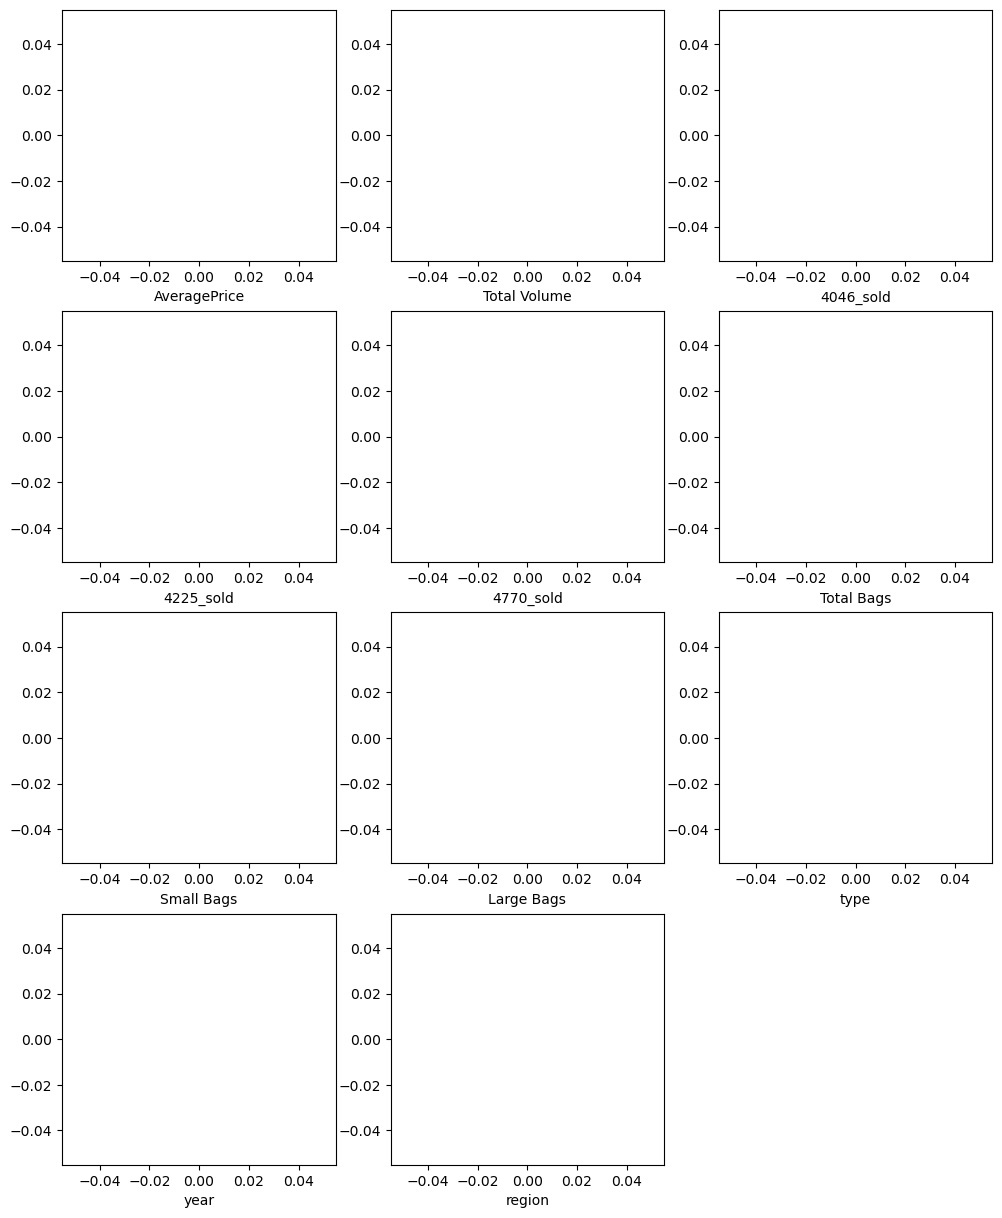

In [88]:
plt.figure(figsize=(12,15), facecolor = 'white')
plotnumber = 1
for column in Avocado2:
    if plotnumber<=11:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(Avocado2[column], color ='blue')
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

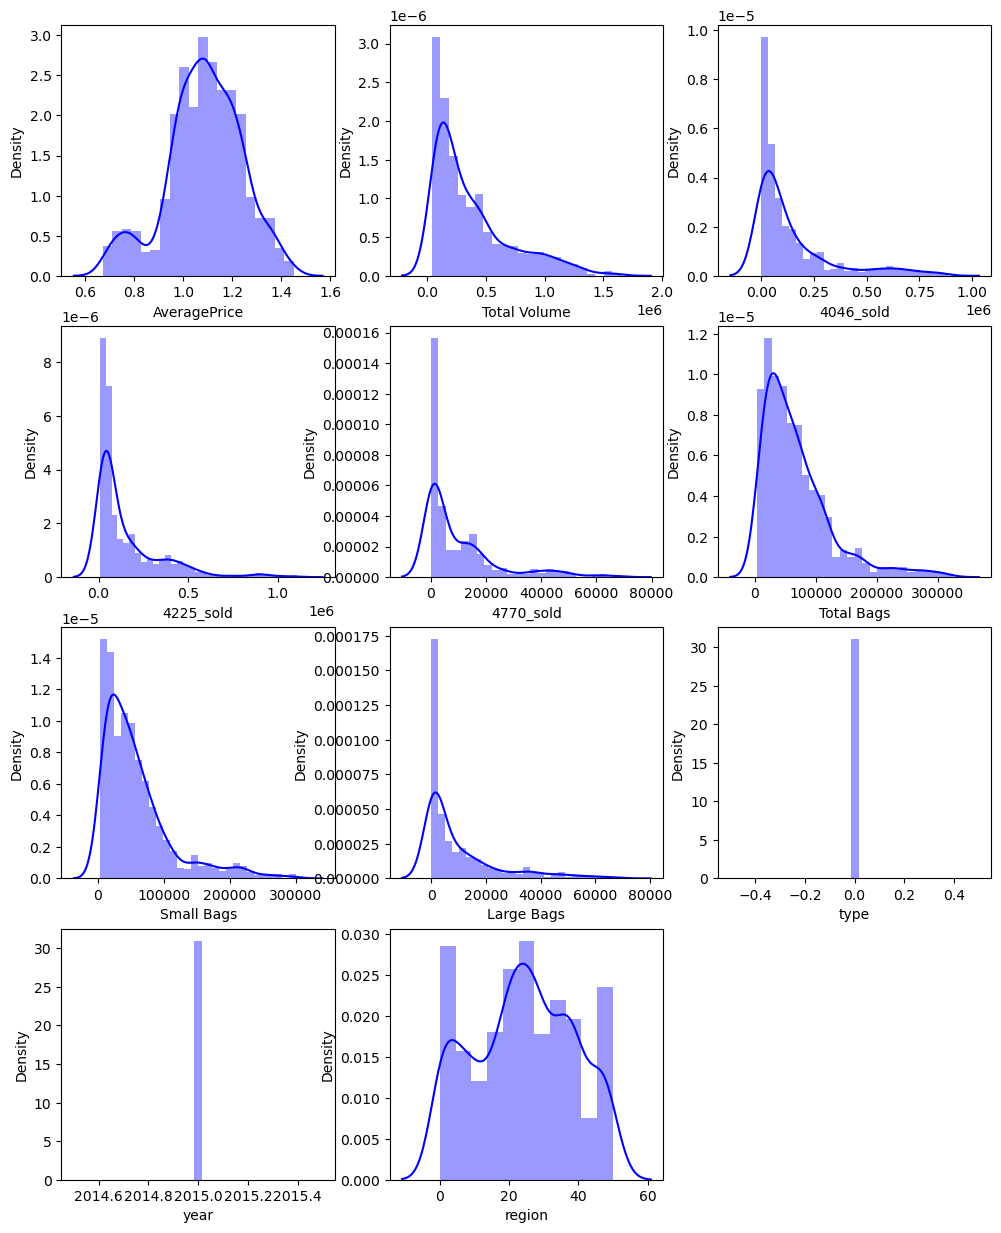

In [89]:
plt.figure(figsize=(12,15), facecolor = 'white')
plotnumber = 1
for column in Avocado1:
    if plotnumber<=11:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(Avocado1[column], color ='blue')
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [90]:
Avocado1.skew()

AveragePrice   -0.376800
Total Volume    1.329084
4046_sold       1.892706
4225_sold       2.119360
4770_sold       1.915178
Total Bags      1.755257
Small Bags      1.859705
Large Bags      1.921980
type            0.000000
year            0.000000
region         -0.049001
dtype: float64

In [91]:
Avocado1[['Total Volume','4046_sold','4225_sold','4770_sold','Total Bags','Small Bags','Large Bags']]=np.cbrt(Avocado1[['Total Volume','4046_sold','4225_sold','4770_sold','Total Bags','Small Bags','Large Bags']])

In [92]:
Avocado1.skew()

AveragePrice   -0.376800
Total Volume    0.451108
4046_sold       0.347501
4225_sold       0.780127
4770_sold       0.361645
Total Bags      0.348187
Small Bags      0.524376
Large Bags      0.263927
type            0.000000
year            0.000000
region         -0.049001
dtype: float64

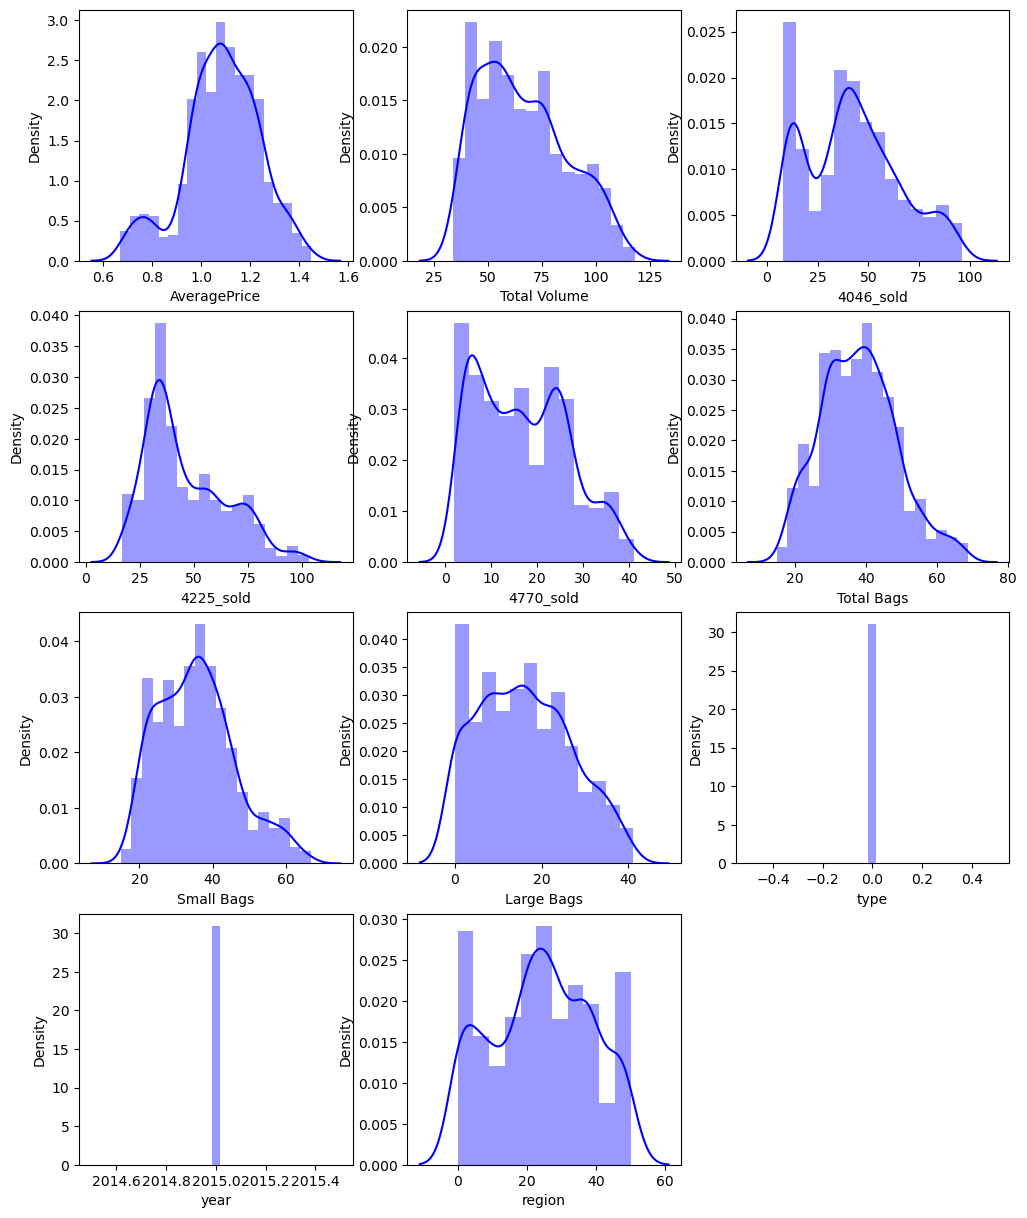

In [93]:
plt.figure(figsize=(12,15), facecolor = 'white')
plotnumber = 1
for column in Avocado1:
    if plotnumber<=11:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(Avocado1[column], color ='blue')
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [94]:
Avocado1.corr()

,AveragePrice,Total Volume,4046_sold,4225_sold,4770_sold,Total Bags,Small Bags,Large Bags,type,year,region
AveragePrice,1.000000,-0.401965,-0.595310,-0.124068,-0.270899,-0.110769,-0.053957,-0.208443,NaN,NaN,0.025526
Total Volume,-0.401965,1.000000,0.673650,0.794634,0.334496,0.847895,0.809436,0.421821,NaN,NaN,0.026497
4046_sold,-0.595310,0.673650,1.000000,0.138904,0.278112,0.412313,0.339400,0.387374,NaN,NaN,0.028087
4225_sold,-0.124068,0.794634,0.138904,1.000000,0.259418,0.723597,0.743790,0.176322,NaN,NaN,-0.041239
4770_sold,-0.270899,0.334496,0.278112,0.259418,1.000000,0.293045,0.343554,-0.047506,NaN,NaN,0.172590
Total Bags,-0.110769,0.847895,0.412313,0.723597,0.293045,1.000000,0.965226,0.434788,NaN,NaN,0.059030
Small Bags,-0.053957,0.809436,0.339400,0.743790,0.343554,0.965226,1.000000,0.210203,NaN,NaN,0.066007
Large Bags,-0.208443,0.421821,0.387374,0.176322,-0.047506,0.434788,0.210203,1.000000,NaN,NaN,0.034434
type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


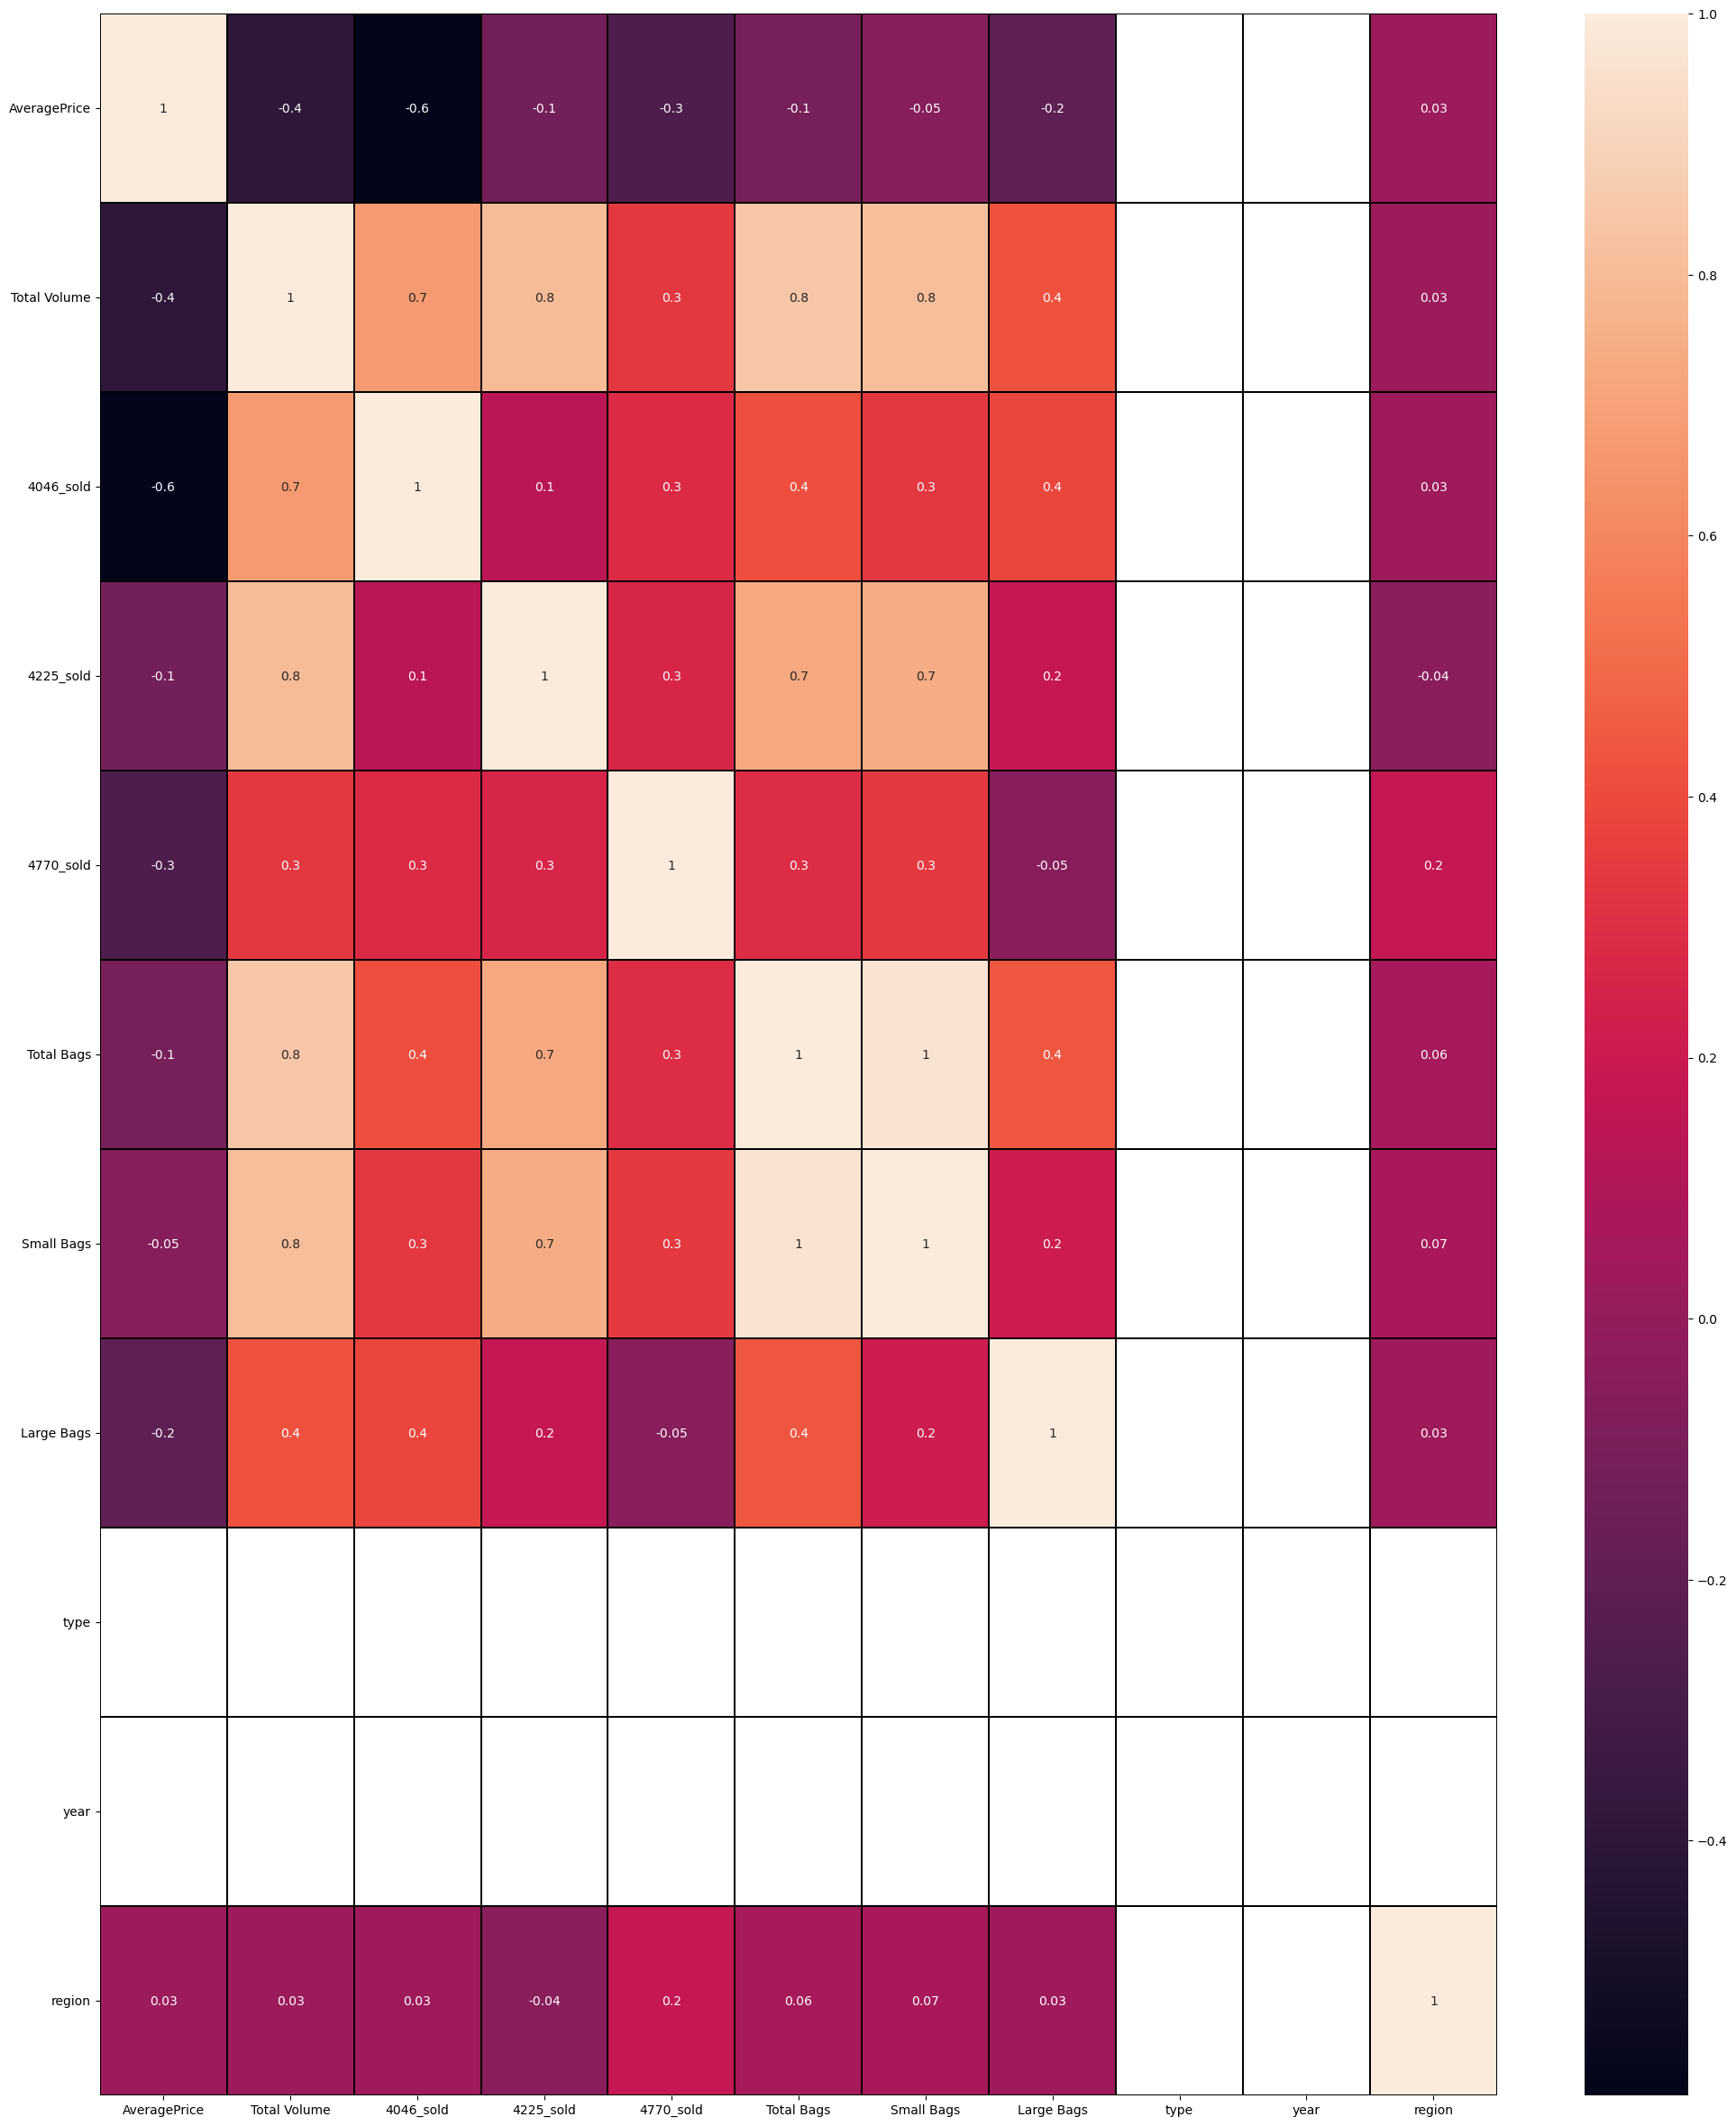

In [95]:
plt.figure(figsize=(25,30))
sns.heatmap(Avocado1.corr(), linewidths = 0.1,fmt = '.1g',linecolor = 'Black', annot =True, )
plt.yticks(rotation = 0);
plt.show()

In [96]:
Avocado1.corr().region.sort_values()

4225_sold      -0.041239
AveragePrice    0.025526
Total Volume    0.026497
4046_sold       0.028087
Large Bags      0.034434
Total Bags      0.059030
Small Bags      0.066007
4770_sold       0.172590
region          1.000000
type                 NaN
year                 NaN
Name: region, dtype: float64

i will drop 'year' and 'type' sice they have no correlation

In [97]:
Avocado1 = Avocado1.drop(columns = ['type','year'])

In [98]:
Avocado1.head()

,AveragePrice,Total Volume,4046_sold,4225_sold,4770_sold,Total Bags,Small Bags,Large Bags,region
Date,,,,,,,,,
2015-12-27,1.33,40.049235,10.120997,37.903460,3.638275,20.564634,20.490870,4.534711,0.0
2015-12-20,1.35,38.001150,8.768933,35.473513,3.878204,21.183249,21.110581,4.602425,0.0
2015-12-13,0.93,49.079175,9.262632,47.790416,5.072283,20.120399,20.035113,4.689671,0.0
2015-06-12,1.08,42.906983,10.421946,41.597133,4.171309,17.978534,17.839520,5.114173,0.0
2015-11-29,1.28,37.093893,9.800999,35.260208,4.231732,18.355039,18.157325,5.825433,0.0


on this dataset i will be working on two target, but one after the other. so my target variable1 is ,region, and the second one is 'Average price'. note: I do not perform any preprocessing on these two column. now to start with the number target i will separate the features and the label where Region is my label here

In [99]:
Avocado1.reset_index()

,Date,AveragePrice,Total Volume,4046_sold,4225_sold,4770_sold,Total Bags,Small Bags,Large Bags,region
0,2015-12-27,1.33,40.049235,10.120997,37.903460,3.638275,20.564634,20.490870,4.534711,0.0
1,2015-12-20,1.35,38.001150,8.768933,35.473513,3.878204,21.183249,21.110581,4.602425,0.0
2,2015-12-13,0.93,49.079175,9.262632,47.790416,5.072283,20.120399,20.035113,4.689671,0.0
3,2015-06-12,1.08,42.906983,10.421946,41.597133,4.171309,17.978534,17.839520,5.114173,0.0
4,2015-11-29,1.28,37.093893,9.800999,35.260208,4.231732,18.355039,18.157325,5.825433,0.0
...,...,...,...,...,...,...,...,...,...,...
958,2015-01-02,0.71,97.130706,84.868095,58.981056,24.162874,44.107252,43.456415,15.526130,29.0
959,2015-01-25,0.80,89.661304,80.370305,49.899647,21.948426,40.582242,40.222240,12.080363,29.0
960,2015-01-18,0.80,90.032734,80.230917,50.454374,23.191309,41.685731,41.517575,9.557655,29.0
961,2015-11-01,0.92,83.629557,70.279537,50.621239,30.345658,43.108410,42.818318,11.711669,29.0


In [100]:
Features = Avocado1.drop(columns = ['region'])
Label = Avocado1['region']

In [101]:
scaler = StandardScaler()
Features = pd.DataFrame(scaler.fit_transform(Features),columns = Features.columns)
Features

,AveragePrice,Total Volume,4046_sold,4225_sold,4770_sold,Total Bags,Small Bags,Large Bags
0,1.594289,-1.301318,-1.413016,-0.444240,-1.332749,-1.639779,-1.432762,-1.080793
1,1.723544,-1.402613,-1.472322,-0.573382,-1.308469,-1.581500,-1.374099,-1.074439
2,-0.990827,-0.854714,-1.450667,0.081214,-1.187632,-1.681630,-1.475904,-1.066254
3,-0.021408,-1.159979,-1.399815,-0.247935,-1.278808,-1.883414,-1.683742,-1.026425
4,1.271149,-1.447484,-1.427052,-0.584718,-1.272693,-1.847944,-1.653658,-0.959691
...,...,...,...,...,...,...,...,...
958,-2.412640,1.521826,1.865660,0.675954,0.744276,0.578157,0.741185,-0.049528
959,-1.830989,1.152404,1.668371,0.193312,0.520181,0.246068,0.435034,-0.372826
960,-1.830989,1.170774,1.662256,0.222794,0.645957,0.350027,0.557652,-0.609518
961,-1.055454,0.854084,1.225753,0.231662,1.369954,0.484057,0.680782,-0.407418


In [102]:
vif = pd.DataFrame()
vif['vif values']= [variance_inflation_factor(Features.values, i) for i in range(len(Features.columns))]
vif['features'] = Features.columns

In [103]:
vif

,vif values,features
0,1.894573,AveragePrice
1,49.885962,Total Volume
2,13.575852,4046_sold
3,17.319013,4225_sold
4,1.324062,4770_sold
5,85.459801,Total Bags
6,76.239924,Small Bags
7,6.242741,Large Bags


'Total Bag' having the highest column i will drop this column

In [104]:
Features.drop(['Total Bags'],axis = 1, inplace = True)

In [105]:
vif = pd.DataFrame()
vif['vif values']= [variance_inflation_factor(Features.values, i) for i in range(len(Features.columns))]
vif['features'] = Features.columns

In [106]:
vif

,vif values,features
0,1.883382,AveragePrice
1,49.758611,Total Volume
2,13.564044,4046_sold
3,17.287059,4225_sold
4,1.303053,4770_sold
5,5.740129,Small Bags
6,1.626411,Large Bags


dropping column 'Total Volume' again been having highest vif number

In [107]:
Features.drop(['Total Volume'],axis = 1, inplace = True)

In [108]:
vif = pd.DataFrame()
vif['vif values']= [variance_inflation_factor(Features.values, i) for i in range(len(Features.columns))]
vif['features'] = Features.columns

In [109]:
vif

,vif values,features
0,1.849506,AveragePrice
1,2.255641,4046_sold
2,2.581794,4225_sold
3,1.280066,4770_sold
4,3.081802,Small Bags
5,1.256247,Large Bags


now to the model building since the data are clean. no null value, multiculinierity soled,skewness reduced e.t.c

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold,cross_val_score
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor as DT
from sklearn.ensemble import RandomForestRegressor

In [111]:
MaxAccu = 0
MaxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(Features,Label,test_size = .30, random_state = i)
    Lr = LinearRegression()
    Lr.fit(x_train,y_train)
    pred = Lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>MaxAccu:
        MaxAccu = acc
        MaxRS = i
print('maximum r2 score is =',MaxAccu,'\n random state = ',MaxRS)

maximum r2 score is = 0.08569645686788141 
 random state =  41


In [112]:
x_train,x_test,y_train,y_test = train_test_split(Features,Label, test_size = 0.30, random_state = MaxRS)

In [113]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr = rfr.predict(x_test)
pred_train = rfr.predict(x_train)
print ('R2 score:', r2_score(y_test,pred_rfr))
print ('R2 score on training Data:',r2_score(y_train,pred_train)*100)
print ('Mean absolute Error:', mean_absolute_error(y_test,pred_rfr))
print ('Mean squared Error:', mean_squared_error(y_test,pred_rfr))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,pred_rfr)))

R2 score: 0.8077181707292103
R2 score on training Data: 97.31221675000765
Mean absolute Error: 4.012491349480969
Mean squared Error: 42.72454775086505
Root mean squared Error: 6.536401743380302


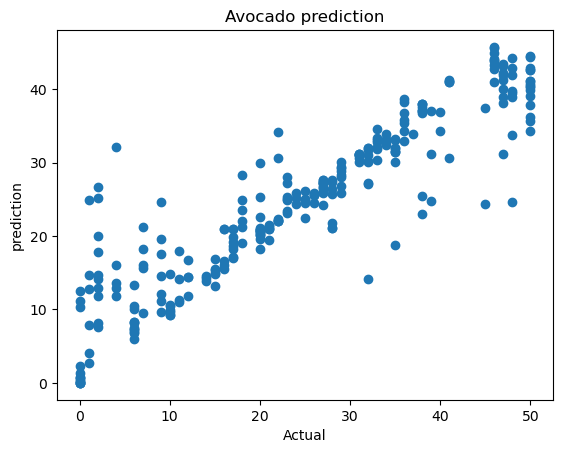

In [114]:
plt.scatter(y_test,pred_rfr)
plt.xlabel('Actual')
plt.ylabel('prediction')
plt.title('Avocado prediction')
plt.show()

In [115]:
from sklearn.tree import DecisionTreeClassifier

In [116]:
dc = DecisionTreeClassifier()
dc.fit(x_train,y_train)
pred_dc = dc.predict(x_test)
pred_train = dc.predict(x_train)
print ('R2 score:', r2_score(y_test,pred_dc))
print ('R2 score on training Data:',r2_score(y_train,pred_train))
print ('Mean absolute Error:', mean_absolute_error(y_test,pred_dc))
print ('Mean squared Error:', mean_squared_error(y_test,pred_dc))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,pred_dc)))

R2 score: 0.8528071748492307
R2 score on training Data: 1.0
Mean absolute Error: 1.494809688581315
Mean squared Error: 32.705882352941174
Root mean squared Error: 5.718905695405475


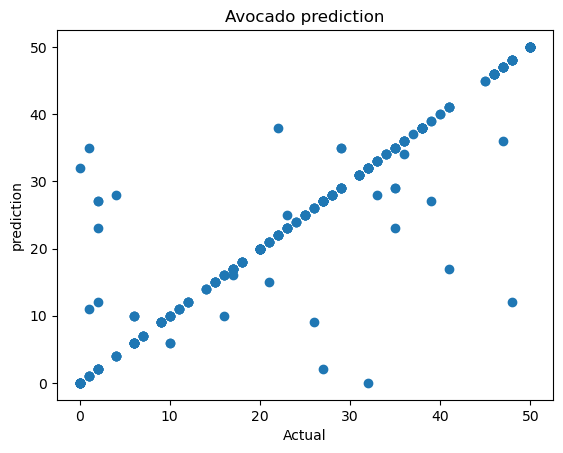

In [117]:
plt.scatter(y_test,pred_dc)
plt.xlabel('Actual')
plt.ylabel('prediction')
plt.title('Avocado prediction')
plt.show()

In [118]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)
pred_train = lr.predict(x_train)
print ('R2 score:', r2_score(y_test,pred_lr))
print ('R2 score on training Data:',r2_score(y_train,pred_train)*100)
print ('Mean absolute Error:', mean_absolute_error(y_test,pred_lr))
print ('Mean squared Error:', mean_squared_error(y_test,pred_lr))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,pred_lr)))

R2 score: 0.08569645686788141
R2 score on training Data: 3.8007971102091753
Mean absolute Error: 12.392863697733755
Mean squared Error: 203.15599001464014
Root mean squared Error: 14.253279973909168


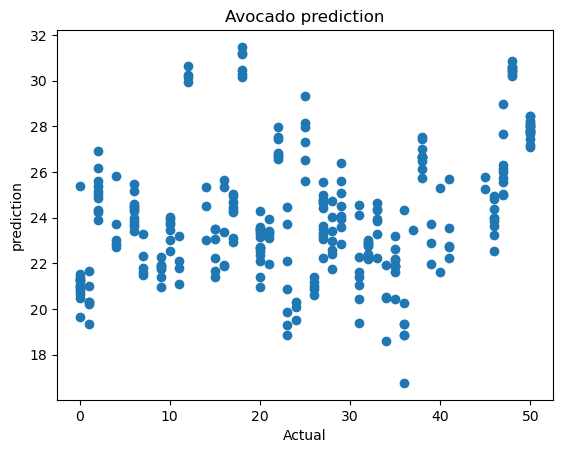

In [119]:
plt.scatter(y_test,pred_lr)
plt.xlabel('Actual')
plt.ylabel('prediction')
plt.title('Avocado prediction')
plt.show()

In [120]:
lasso = Lasso()
lasso.fit(x_train,y_train)
pred_lasso = lasso.predict(x_test)
pred_train = lasso.predict(x_train)
print ('R2 score:', r2_score(y_test,pred_lasso))
print ('R2 score on training Data:',r2_score(y_train,pred_train)*100)
print ('Mean absolute Error:', mean_absolute_error(y_test,pred_lasso))
print ('Mean squared Error:', mean_squared_error(y_test,pred_lasso))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2 score: 0.02520000193943417
R2 score on training Data: 1.755172327974519
Mean absolute Error: 12.481283873846907
Mean squared Error: 216.5981529436629
Root mean squared Error: 14.71727396441552


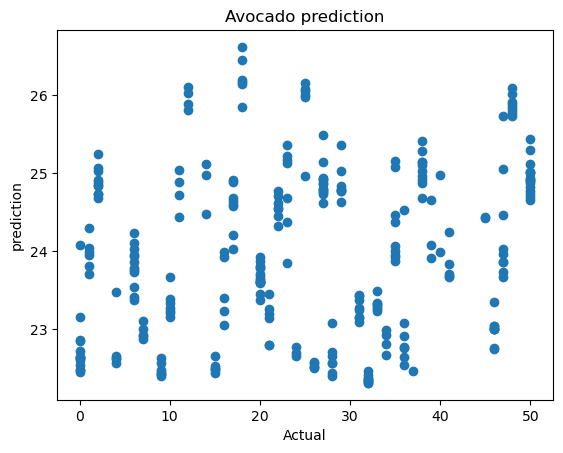

In [121]:
plt.scatter(y_test,pred_lasso)
plt.xlabel('Actual')
plt.ylabel('prediction')
plt.title('Avocado prediction')
plt.show()

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)
pred_train = rfc.predict(x_train)
print ('R2 score:', r2_score(y_test,pred_rfc))
print ('R2 score on training Data:',r2_score(y_train,pred_train))
print ('Mean absolute Error:', mean_absolute_error(y_test,pred_rfc))
print ('Mean squared Error:', mean_squared_error(y_test,pred_rfc))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,pred_rfc)))

R2 score: 0.9235849351444324
R2 score on training Data: 1.0
Mean absolute Error: 0.6678200692041523
Mean squared Error: 16.97923875432526
Root mean squared Error: 4.12058718562358


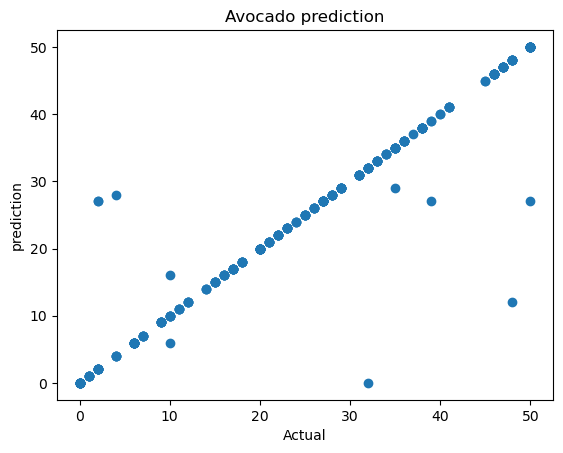

In [124]:
plt.scatter(y_test,pred_rfc)
plt.xlabel('Actual')
plt.ylabel('prediction')
plt.title('Avocado prediction')
plt.show()

In [125]:
from sklearn.model_selection import cross_val_score

In [126]:
score1 = cross_val_score(rfr,Features,Label,cv=5,scoring='r2')
print(score1)
print(score1.mean())
print('difference =',(r2_score(y_test,pred_rfr)-score1.mean()))

[ 0.12803621 -0.17676138 -0.1556076  -2.05135145 -2.11634193]
-0.8744052317163762
difference = 1.6821234024455864


In [127]:
score2 = cross_val_score(dc,Features,Label,cv=5,scoring='r2')
print(score2)
print(score2.mean())
print('difference =',(r2_score(y_test,pred_dc)-score2.mean()))

[0.45620484 0.78378646 0.54786683 0.64075924 0.40462795]
0.5666490625374643
difference = 0.28615811231176647


In [128]:
score3 = cross_val_score(lr,Features,Label,cv=5,scoring='r2')
print(score3)
print(score3.mean())
print('difference =',(r2_score(y_test,pred_lr)-score3.mean()))

[-0.00279984 -0.20024852 -0.39103445 -1.10553713 -0.08028347]
-0.3559806832412344
difference = 0.4416771401091158


In [129]:
score4 = cross_val_score(lasso,Features,Label,cv=5,scoring='r2')
print(score4)
print(score4.mean())
print('difference =',(r2_score(y_test,pred_lasso)-score4.mean()))

[-0.08060097 -0.21268443 -0.20162158 -0.71485429 -0.13140316]
-0.2682328846884508
difference = 0.29343288662788497


In [130]:
score5 = cross_val_score(rfc,Features,Label,cv=5,scoring='r2')
print(score5)
print(score5.mean())
print('difference =',(r2_score(y_test,pred_rfc)-score5.mean()))

[0.77041345 0.87693538 0.99586124 0.88880583 0.6303944 ]
0.8324820610573308
difference = 0.0911028740871016


i will choose randomforestclassifier and tune this as my final modelbecuase it has the lowest difference

In [131]:
from sklearn.model_selection import GridSearchCV

In [132]:
# n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

In [133]:
params_grid = {'n_estimators':[20,25,30,35,40,45,50],
             'criterion': [ 'gini','dentropy','log_loss'],
             'max_depth':[3,5,7,9,11,13],
             'max_features':['sqrt','log2','none']
             }

In [134]:
grid_search =GridSearchCV(estimator=rfc, param_grid = params_grid, cv = 5)

In [135]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'dentropy', 'log_loss'],
                         'max_depth': [3, 5, 7, 9, 11, 13],
                         'max_features': ['sqrt', 'log2', 'none'],
                         'n_estimators': [20, 25, 30, 35, 40, 45, 50]})

In [136]:
conluded_parametrs = grid_search.best_params_
print(conluded_parametrs)

{'criterion': 'gini', 'max_depth': 13, 'max_features': 'sqrt', 'n_estimators': 50}


In [137]:
rfc_final = RandomForestClassifier(criterion= 'gini', max_depth= 13, max_features= 'sqrt',n_estimators= 45)

In [138]:
rfc_final

RandomForestClassifier(max_depth=13, max_features='sqrt', n_estimators=45)

In [139]:
rfc_final.fit(x_train,y_train)
prediction = rfc_final.predict(x_test)
print ('R2 score:', r2_score(y_test,prediction))
print ('Mean absolute Error:', mean_absolute_error(y_test,prediction))
print ('Mean squared Error:', mean_squared_error(y_test,prediction))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,prediction)))

R2 score: 0.9410574647486605
Mean absolute Error: 0.6332179930795848
Mean squared Error: 13.09688581314879
Root mean squared Error: 3.6189619800640056


In [140]:
import joblib

In [141]:
import pickle
filename = 'avocado.pkl'
pickle.dump(rfc_final,open(filename,'wb'))

In [142]:
loaded_rfc_final=pickle.load(open(filename,'rb'))
result = loaded_rfc_final.score(x_test,y_test)
print(result*100)

95.50173010380622


Now I will set the averageprice as the lable in other to predict for the averageprice

In [143]:
Features = Avocado1.drop(columns = ['AveragePrice'])
Label = Avocado1['AveragePrice']

In [144]:
Features

,Total Volume,4046_sold,4225_sold,4770_sold,Total Bags,Small Bags,Large Bags,region
Date,,,,,,,,
2015-12-27,40.049235,10.120997,37.903460,3.638275,20.564634,20.490870,4.534711,0.0
2015-12-20,38.001150,8.768933,35.473513,3.878204,21.183249,21.110581,4.602425,0.0
2015-12-13,49.079175,9.262632,47.790416,5.072283,20.120399,20.035113,4.689671,0.0
2015-06-12,42.906983,10.421946,41.597133,4.171309,17.978534,17.839520,5.114173,0.0
2015-11-29,37.093893,9.800999,35.260208,4.231732,18.355039,18.157325,5.825433,0.0
...,...,...,...,...,...,...,...,...
2015-01-02,97.130706,84.868095,58.981056,24.162874,44.107252,43.456415,15.526130,29.0
2015-01-25,89.661304,80.370305,49.899647,21.948426,40.582242,40.222240,12.080363,29.0
2015-01-18,90.032734,80.230917,50.454374,23.191309,41.685731,41.517575,9.557655,29.0


In [145]:
scaler = StandardScaler()
Features = pd.DataFrame(scaler.fit_transform(Features),columns = Features.columns)
Features

,Total Volume,4046_sold,4225_sold,4770_sold,Total Bags,Small Bags,Large Bags,region
0,-1.301318,-1.413016,-0.444240,-1.332749,-1.639779,-1.432762,-1.080793,-1.680855
1,-1.402613,-1.472322,-0.573382,-1.308469,-1.581500,-1.374099,-1.074439,-1.680855
2,-0.854714,-1.450667,0.081214,-1.187632,-1.681630,-1.475904,-1.066254,-1.680855
3,-1.159979,-1.399815,-0.247935,-1.278808,-1.883414,-1.683742,-1.026425,-1.680855
4,-1.447484,-1.427052,-0.584718,-1.272693,-1.847944,-1.653658,-0.959691,-1.680855
...,...,...,...,...,...,...,...,...
958,1.521826,1.865660,0.675954,0.744276,0.578157,0.741185,-0.049528,0.338123
959,1.152404,1.668371,0.193312,0.520181,0.246068,0.435034,-0.372826,0.338123
960,1.170774,1.662256,0.222794,0.645957,0.350027,0.557652,-0.609518,0.338123
961,0.854084,1.225753,0.231662,1.369954,0.484057,0.680782,-0.407418,0.338123


In [146]:
vif = pd.DataFrame()
vif['vif values']= [variance_inflation_factor(Features.values, i) for i in range(len(Features.columns))]
vif['features'] = Features.columns

In [147]:
vif

,vif values,features
0,50.268746,Total Volume
1,13.759929,4046_sold
2,18.035742,4225_sold
3,1.308715,4770_sold
4,85.442002,Total Bags
5,74.251570,Small Bags
6,6.203882,Large Bags
7,1.090276,region


since Total Bag and Total Volume having higher vif values so i will drop the two columns to solve the issue of multiculinearity

In [148]:
Features.drop(['Total Volume'],axis = 1, inplace = True)

In [149]:
vif = pd.DataFrame()
vif['vif values']= [variance_inflation_factor(Features.values, i) for i in range(len(Features.columns))]
vif['features'] = Features.columns

In [150]:
vif

,vif values,features
0,1.453140,4046_sold
1,2.404189,4225_sold
2,1.287678,4770_sold
3,84.998641,Total Bags
4,73.421189,Small Bags
5,6.009304,Large Bags
6,1.063782,region


In [151]:
Features.drop(['Total Bags'],axis = 1, inplace = True)

In [152]:
vif = pd.DataFrame()
vif['vif values']= [variance_inflation_factor(Features.values, i) for i in range(len(Features.columns))]
vif['features'] = Features.columns

In [153]:
vif

,vif values,features
0,1.435666,4046_sold
1,2.402535,4225_sold
2,1.273201,4770_sold
3,2.666439,Small Bags
4,1.263042,Large Bags
5,1.059256,region


multiculinearity issue resolved

In [154]:
MaxAccu = 0
MaxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(Features,Label,test_size = .30, random_state = i)
    Lr = LinearRegression()
    Lr.fit(x_train,y_train)
    pred = Lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>MaxAccu:
        MaxAccu = acc
        MaxRS = i
print('maximum r2 score is =',MaxAccu,'\n random state = ',MaxRS)

maximum r2 score is = 0.5401303396724342 
 random state =  169


In [155]:
x_train,x_test,y_train,y_test = train_test_split(Features,Label, test_size = 0.30, random_state = MaxRS)

In [156]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr = rfr.predict(x_test)
pred_train = rfr.predict(x_train)
print ('R2 score:', r2_score(y_test,pred_rfr))
print ('R2 score on training Data:',r2_score(y_train,pred_train)*100)
print ('Mean absolute Error:', mean_absolute_error(y_test,pred_rfr))
print ('Mean squared Error:', mean_squared_error(y_test,pred_rfr))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,pred_rfr)))

R2 score: 0.7850882537803738
R2 score on training Data: 96.55092712271941
Mean absolute Error: 0.05663321799307956
Mean squared Error: 0.005837401453287196
Root mean squared Error: 0.07640288903756975


In [157]:
lasso = Lasso()
lasso.fit(x_train,y_train)
pred_lasso = lasso.predict(x_test)
pred_train = lasso.predict(x_train)
print ('R2 score:', r2_score(y_test,pred_lasso))
print ('R2 score on training Data:',r2_score(y_train,pred_train)*100)
print ('Mean absolute Error:', mean_absolute_error(y_test,pred_lasso))
print ('Mean squared Error:', mean_squared_error(y_test,pred_lasso))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2 score: -0.009665367389384283
R2 score on training Data: 0.0
Mean absolute Error: 0.12614299795673203
Mean squared Error: 0.02742438320197459
Root mean squared Error: 0.16560308934912593


In [158]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
pred_train = knn.predict(x_train)
print ('R2 score:', r2_score(y_test,pred_knn))
print ('R2 score on training Data:',r2_score(y_train,pred_train)*100)
print ('Mean absolute Error:', mean_absolute_error(y_test,pred_knn))
print ('Mean squared Error:', mean_squared_error(y_test,pred_knn))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 score: 0.782372892144408
R2 score on training Data: 86.30989874265934
Mean absolute Error: 0.05754325259515569
Mean squared Error: 0.005911155709342559
Root mean squared Error: 0.0768840406673749


In [159]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)
pred_train = lr.predict(x_train)
print ('R2 score:', r2_score(y_test,pred_lr))
print ('R2 score on training Data:',r2_score(y_train,pred_train)*100)
print ('Mean absolute Error:', mean_absolute_error(y_test,pred_lr))
print ('Mean squared Error:', mean_squared_error(y_test,pred_lr))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,pred_lr)))

R2 score: 0.5401303396724342
R2 score on training Data: 41.1951864574999
Mean absolute Error: 0.08950907297945958
Mean squared Error: 0.012490912529162042
Root mean squared Error: 0.11176275108085897


In [160]:
score6 = cross_val_score(rfr,Features,Label,cv=5,scoring='r2')
print(score6)
print(score6.mean())
print('difference =',(r2_score(y_test,pred_rfr)-score6.mean()))

[-0.0150219   0.07142087 -0.2520517   0.30558196  0.66823386]
0.15563261942827855
difference = 0.6294556343520953


In [161]:
score7 = cross_val_score(lasso,Features,Label,cv=5,scoring='r2')
print(score7)
print(score7.mean())
print('difference =',(r2_score(y_test,pred_lasso)-score7.mean()))

[-0.40225025 -0.16096182 -0.05024332 -0.05588279 -0.00048382]
-0.13396439758998174
difference = 0.12429903020059746


In [162]:
score8 = cross_val_score(knn,Features,Label,cv=5,scoring='r2')
print(score8)
print(score8.mean())
print('difference =',(r2_score(y_test,pred_knn)-score8.mean()))

[-0.27956146  0.16719746 -0.68580856  0.27828439  0.65935056]
0.027892479104815716
difference = 0.7544804130395922


In [163]:
score9 = cross_val_score(lr,Features,Label,cv=5,scoring='r2')
print(score9)
print(score9.mean())
print('difference =',(r2_score(y_test,pred_rfr)-score9.mean()))

[ 0.18871235  0.59807395 -0.14610749  0.3733567   0.39012099]
0.2808312999793016
difference = 0.5042569538010722


i am choosing  the knn as my best model to tune for final

In [164]:
params_grid = {'metric':['euclidean','minkowski','manhatta'],
             'weights': [ 'uniform','distance'],
             'n_neighbors':[3,5,7,9,11,13]
             }

In [165]:
grid_search =GridSearchCV(estimator=knn, param_grid = params_grid, cv = 5)

In [166]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'minkowski', 'manhatta'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']})

In [167]:
my_best_parameter = grid_search.best_params_
print(my_best_parameter)

{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


In [168]:
final_model = KNN(metric= 'euclidean', n_neighbors= 3, weights= 'distance')

In [169]:
final_model

KNeighborsRegressor(metric='euclidean', n_neighbors=3, weights='distance')

In [170]:
final_model.fit(x_train,y_train)
prediction = final_model.predict(x_test)
print ('R2 score:', r2_score(y_test,prediction))
print ('Mean absolute Error:', mean_absolute_error(y_test,prediction))
print ('Mean squared Error:', mean_squared_error(y_test,prediction))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,prediction)))

R2 score: 0.8222557639825128
Mean absolute Error: 0.05146760848505287
Mean squared Error: 0.004827862971163881
Root mean squared Error: 0.06948282500851473


In [171]:
import joblib

In [172]:
import pickle
filename = 'avocado.pkl'
pickle.dump(final_model,open(filename,'wb'))

In [173]:
import pickle
loaded_final_model=pickle.load(open(filename,'rb'))
result = loaded_final_model.score(x_test,y_test)
print(result*100)

82.22557639825128
